In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd drive/My\ Drive/Colab/Walmart\ Sales\ Prediction

/content/drive/My Drive/Colab/Walmart Sales Prediction


# Walmart Sales Prediction

In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt   

In [4]:
import os
print(os.listdir("Data"))

['features.csv', 'sampleSubmission.csv', 'stores.csv', 'test.csv', 'train.csv']


### Reading training data

In [0]:
train = pd.read_csv("./Data/train.csv", names=['Store', 'Dept', 'Date', 'WeeklySales', 'IsHoliday'], sep=',', header=0)

In [6]:
train.head()

,Store,Dept,Date,WeeklySales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
train.describe()

,Store,Dept,WeeklySales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


Weekly sales cannot have negative values

In [8]:
train["WeeklySales"][train["WeeklySales"]<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
train.describe()

,Store,Dept,WeeklySales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.467250
std,12.785297,30.492054,22711.032446
min,1.000000,1.000000,0.000000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


### Reading features data

In [0]:
features = pd.read_csv("./Data/features.csv", names=['Store', 'Date', 'Temperature', 'FuelPrice', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'], sep=',' , header=0)

In [11]:
features.head()

,Store,Date,Temperature,FuelPrice,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [12]:
features.describe()

,Store,Temperature,FuelPrice,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


Removing Negative Values

In [13]:
features["MarkDown1"][features["MarkDown1"]<0]=0
features["MarkDown2"][features["MarkDown2"]<0]=0
features["MarkDown3"][features["MarkDown3"]<0]=0
features["MarkDown4"][features["MarkDown4"]<0]=0
features["MarkDown5"][features["MarkDown5"]<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doi

In [14]:
features.describe()

,Store,Temperature,FuelPrice,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7033.397205,3384.393567,1760.211982,3292.935886,4132.271284,172.460809,7.826821
std,12.987966,18.678607,0.431337,9261.852799,8793.497335,11276.444212,6792.329861,13086.672614,39.738346,1.877259
min,1.000000,-7.290000,2.472000,0.000000,0.000000,0.000000,0.220000,0.000000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


### Reading store data

In [0]:
stores = pd.read_csv("./Data/stores.csv", names=['Store', 'Type', 'Size'], sep=',', header=0)

In [16]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [17]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


### Reading test data

In [0]:
test = pd.read_csv("./Data/test.csv", names=['Store', 'Dept', 'Date', 'IsHoliday'], sep=',', header=0)

In [19]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


### Merging Train, Features and Store dataset

In [0]:
dataset = pd.merge(train, stores, on='Store', how="left").merge(features, on=['Store','Date','IsHoliday'], how="inner")

In [21]:
dataset.head()

,Store,Dept,Date,WeeklySales,IsHoliday,Type,Size,Temperature,FuelPrice,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [22]:
dataset.describe()

,Store,Dept,WeeklySales,Size,Temperature,FuelPrice,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.467250,136727.915739,60.090059,3.361027,7246.420196,3334.992320,1439.437571,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.032446,60980.583328,18.447931,0.458515,8291.221345,9475.225645,9623.075846,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,0.000000,34875.000000,-2.060000,2.472000,0.270000,0.000000,0.000000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


Observation: There are missing values in CPI, Unemployment, Temperature,we have filled values by mean imputation

In [0]:
dataset['CPI'] = dataset['CPI'].fillna(dataset['CPI'].mean())
dataset['Temperature'] = dataset['Temperature'].fillna(dataset['Temperature'].mean())
dataset['Unemployment'] = dataset['Unemployment'].fillna(dataset['Unemployment'].mean())

In [0]:
dataset.fillna(0,inplace=True)

In [25]:
dataset.head()

,Store,Dept,Date,WeeklySales,IsHoliday,Type,Size,Temperature,FuelPrice,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106


### Data Visualisation

#### First start with different stores

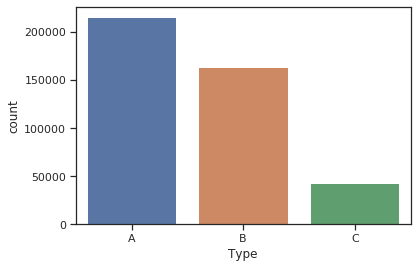

In [26]:
sns.countplot(dataset['Type'])

Store A are largest followed by Store B and Store C 

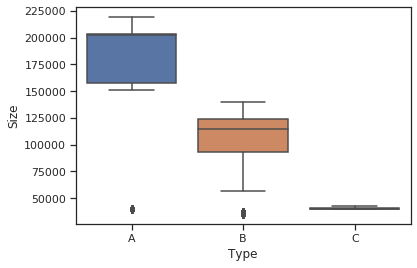

In [27]:
fig=sns.boxplot(x='Type',y='Size',data=dataset[['Type','Size']])

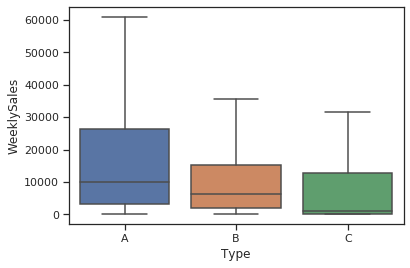

In [28]:
fig=sns.boxplot(x='Type',y='WeeklySales',data=dataset[['Type','WeeklySales']], showfliers=False)

Bigger stores have higher sales.

#### Lets map every feature with Weekly Sales

In [0]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['WeeklySales'])
    plt.ylabel('WeeklySales')
    plt.xlabel(column)

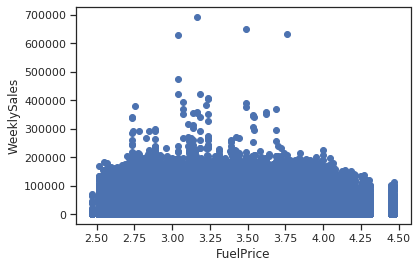

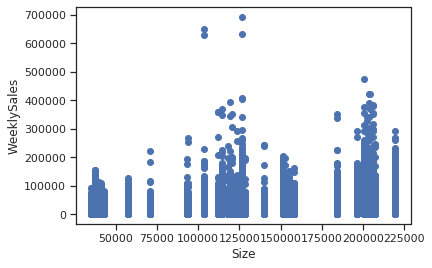

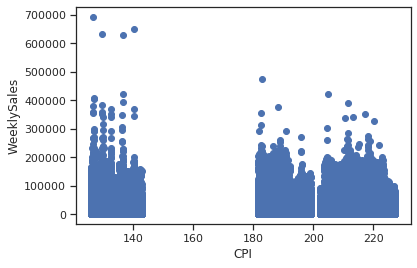

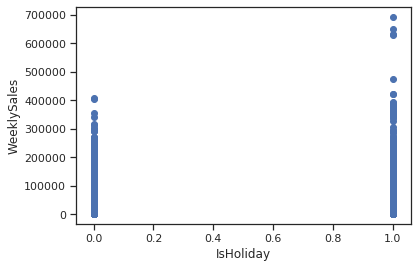

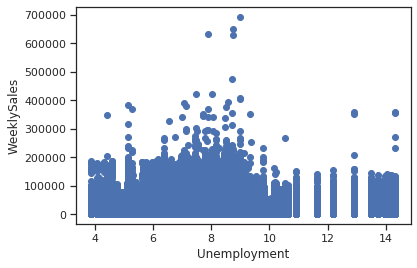

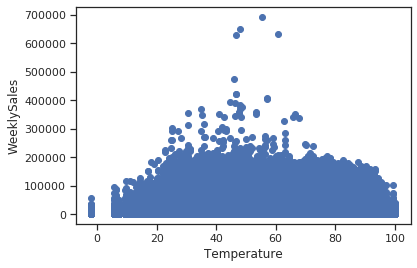

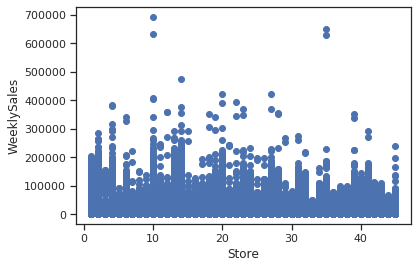

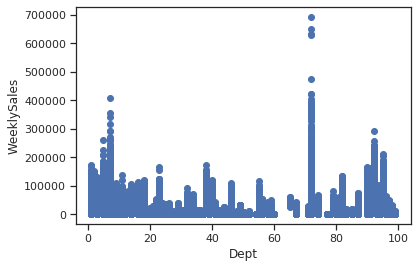

In [30]:
scatter(dataset, 'FuelPrice')
scatter(dataset, 'Size')
scatter(dataset, 'CPI')
scatter(dataset, 'IsHoliday')
scatter(dataset, 'Unemployment')
scatter(dataset, 'Temperature')
scatter(dataset, 'Store')
scatter(dataset, 'Dept')


#### Lets compare the Holidays vs non-Holidays sales of the stores

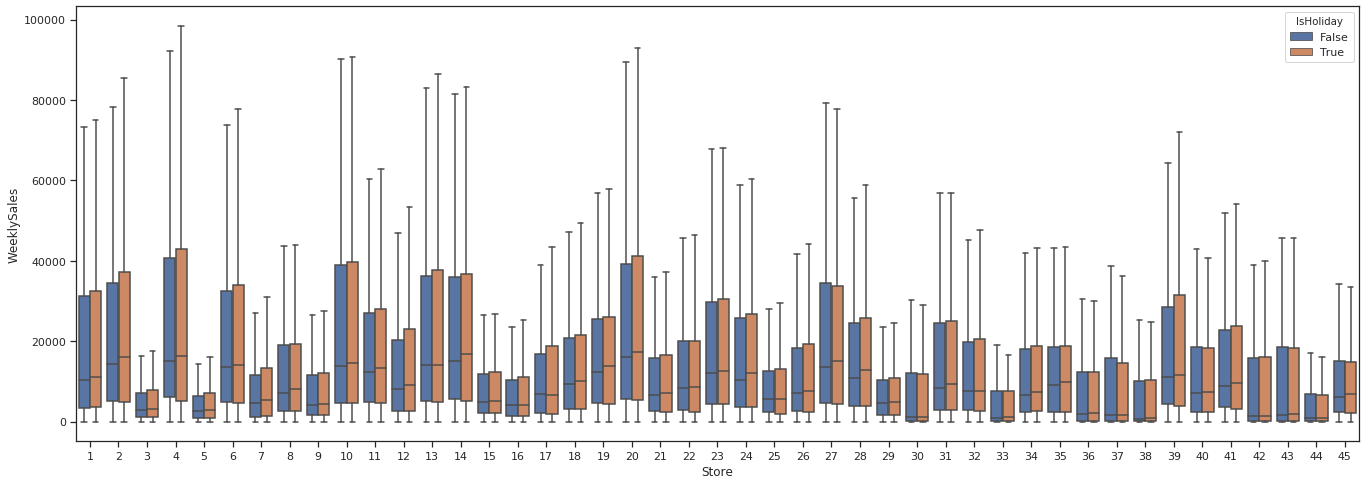

In [31]:
f, ax = plt.subplots(figsize=(23, 8))
fig=sns.boxplot(x='Store',y='WeeklySales',data=dataset[['Store','WeeklySales', 'IsHoliday']], showfliers=False, hue="IsHoliday")

Sales are higher on Holidays compared to other days

#### Lets plot pairwise relationships in the dataset.

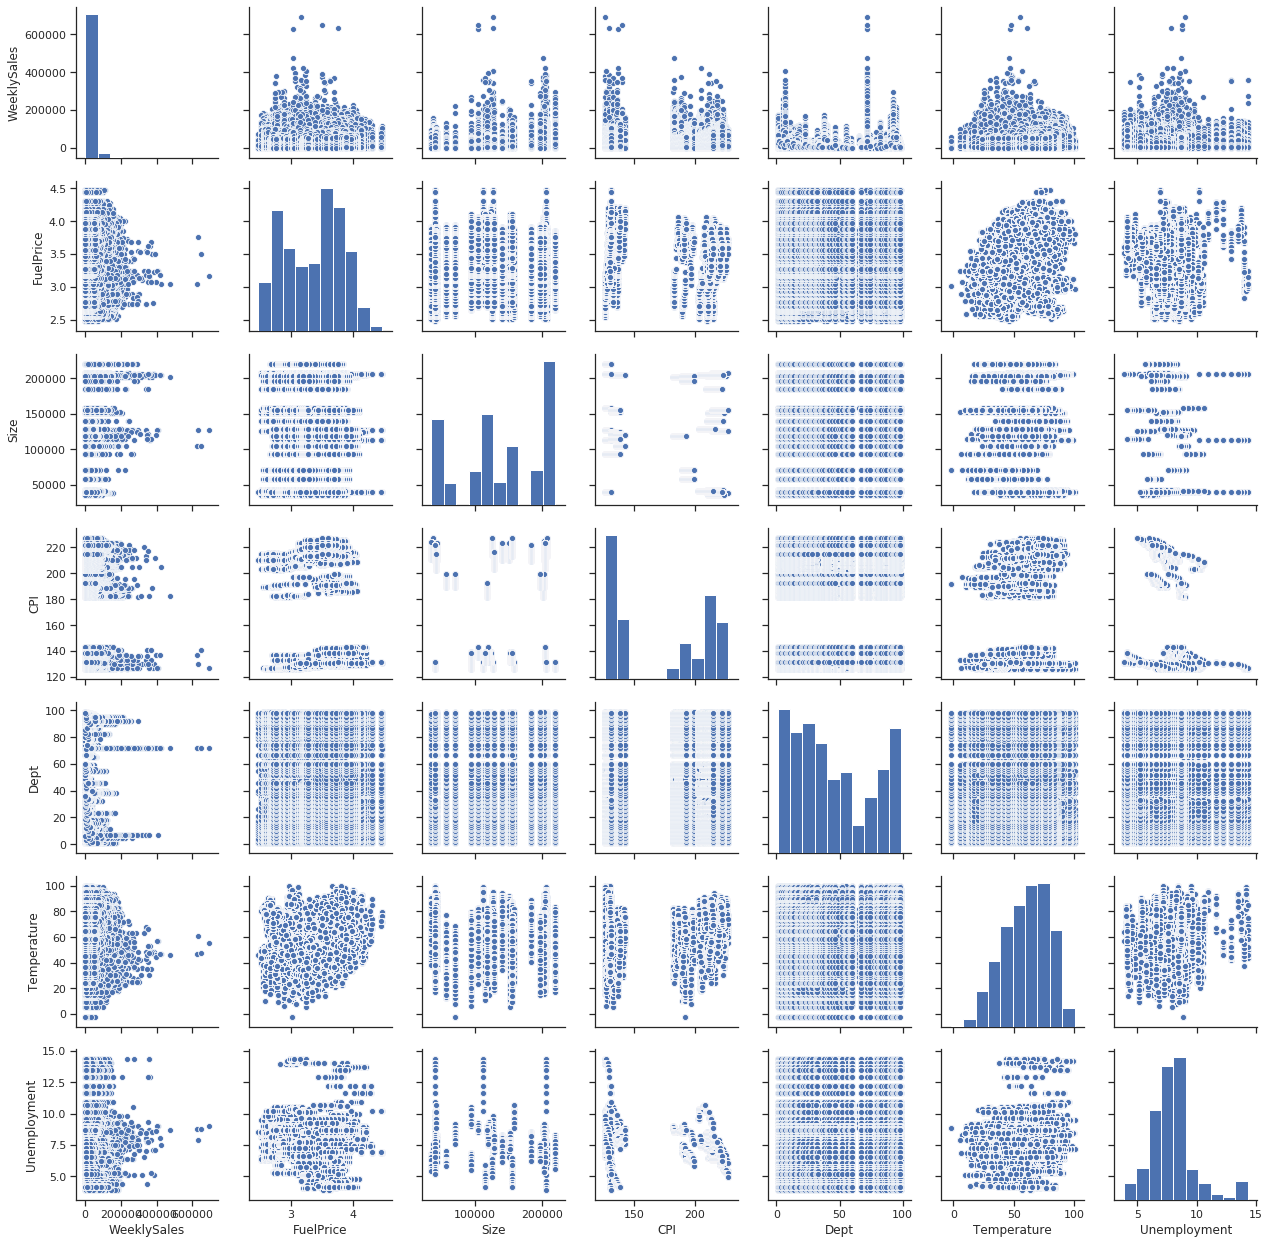

In [32]:
sns.pairplot(dataset, vars=['WeeklySales', 'FuelPrice', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

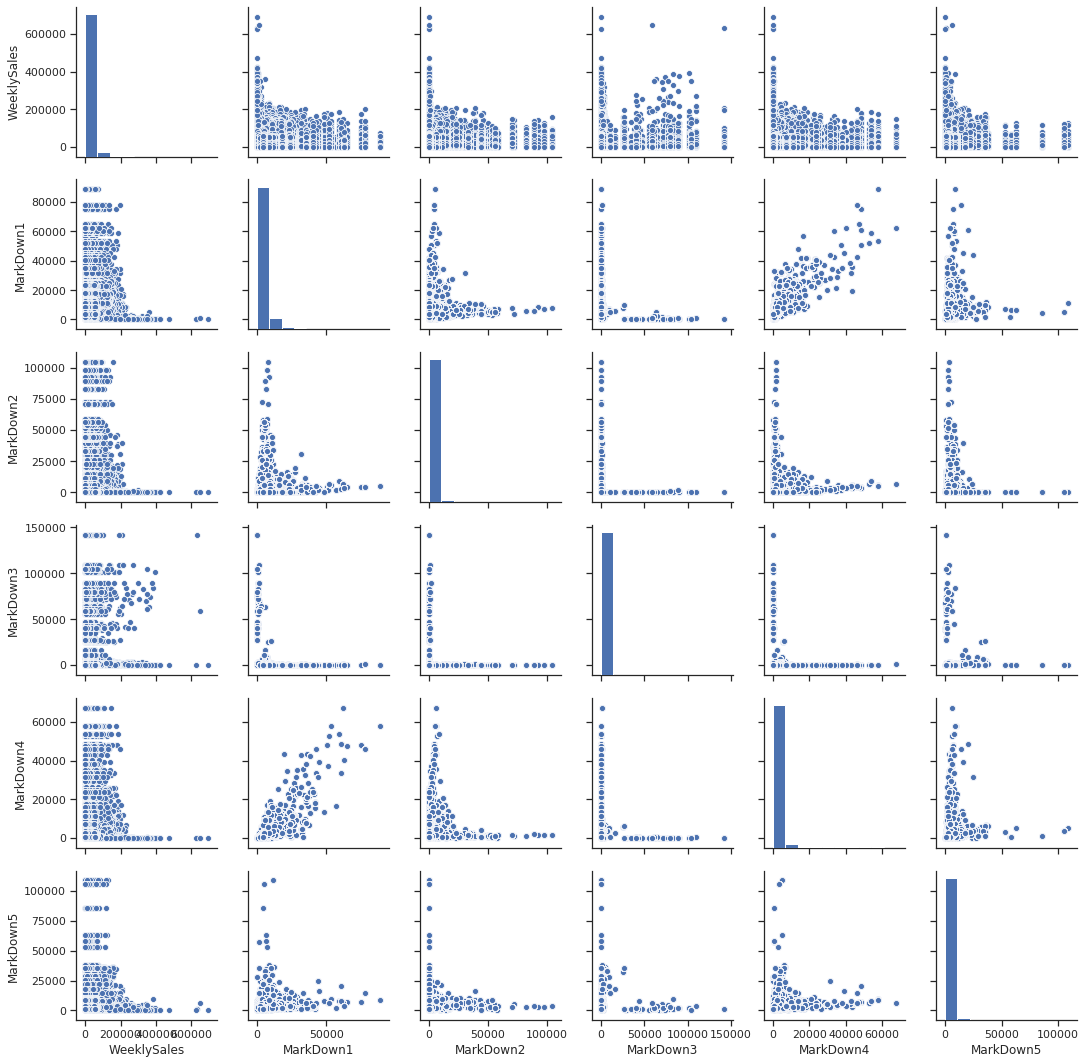

In [33]:
sns.pairplot(dataset, vars=['WeeklySales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

### Data Engineering

In [0]:
dataset.IsHoliday=dataset.IsHoliday.astype(int)             # Encoding for IsHoliday

In [0]:
le=preprocessing.LabelEncoder().fit(dataset['Type'])        #encode Type Feature
le.classes_
dataset.Type=le.transform(dataset['Type'])

In [36]:
dataset.tail()

,Store,Dept,Date,WeeklySales,IsHoliday,Type,Size,Temperature,FuelPrice,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
421565,45,93,2012-10-26,2487.80,0,1,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,5203.31,0,1,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,56017.47,0,1,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,6817.48,0,1,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421569,45,98,2012-10-26,1076.80,0,1,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [37]:
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset['year']=dataset['Date'].dt.year
dataset['month']=dataset['Date'].dt.month
dataset['day']=dataset['Date'].dt.day
del dataset['Date']

dataset.head()

,Store,Dept,WeeklySales,IsHoliday,Type,Size,Temperature,FuelPrice,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
0,1,1,24924.50,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5
1,1,2,50605.27,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5
2,1,3,13740.12,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5
3,1,4,39954.04,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5
4,1,5,32229.38,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5


#### Finding Correlation

[]

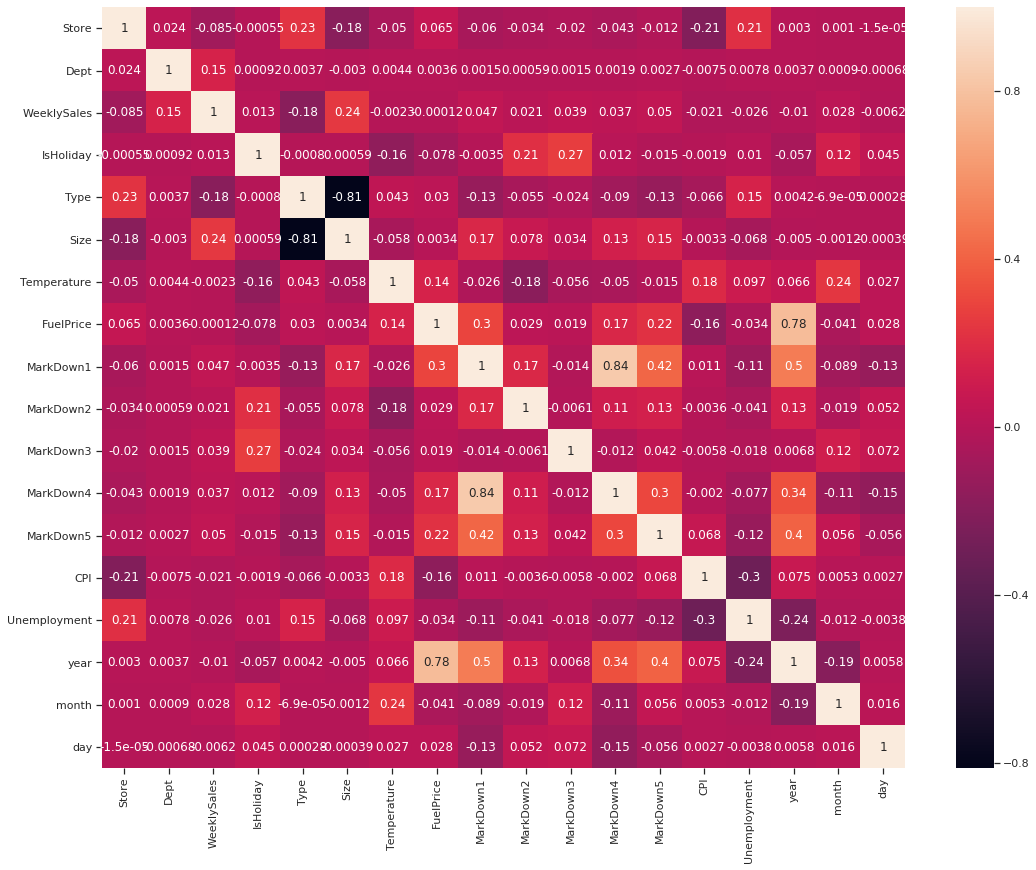

In [38]:
fig = plt.figure(figsize=(18, 14))
corr = dataset.corr()
sns.heatmap(corr, annot=True)
#c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
#fig.colorbar(c)
plt.plot()

1. Only FuelPrice, Markdown1, Markdown4 and Markdown5 are correlated.
2. Size and Type are negatively correlated.
3. Correlated features should be deleted.

#### Removing highly correlated features

In [0]:
dataset = dataset.drop(['MarkDown4', 'year', 'Size'], axis=1)

In [40]:
dataset.head()

,Store,Dept,WeeklySales,IsHoliday,Type,Temperature,FuelPrice,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Unemployment,month,day
0,1,1,24924.50,0,0,42.31,2.572,0.0,0.0,0.0,0.0,211.096358,8.106,2,5
1,1,2,50605.27,0,0,42.31,2.572,0.0,0.0,0.0,0.0,211.096358,8.106,2,5
2,1,3,13740.12,0,0,42.31,2.572,0.0,0.0,0.0,0.0,211.096358,8.106,2,5
3,1,4,39954.04,0,0,42.31,2.572,0.0,0.0,0.0,0.0,211.096358,8.106,2,5
4,1,5,32229.38,0,0,42.31,2.572,0.0,0.0,0.0,0.0,211.096358,8.106,2,5


### Modelling

In [0]:
def knn():
    knn = KNeighborsRegressor(n_neighbors=10)
    return knn

def extraTreesRegressor():
    clf = ExtraTreesRegressor(n_estimators=100,max_features='auto', verbose=1, n_jobs=1)
    return clf

def randomForestRegressor():
    clf = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=1)
    return clf

def svm():
    clf = SVR(kernel='rbf', gamma='auto')
    return clf

def nn():
    clf = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', verbose=3)
    return clf

def predict_(m, test_x):
    return pd.Series(m.predict(test_x))

def model_():
#     return knn()
     return extraTreesRegressor()
#     return svm()
#     return nn()
#     return randomForestRegressor()    

def train_(train_x, train_y):
    m = model_()
    m.fit(train_x, train_y)
    return m

def train_and_predict(train_x, train_y, test_x):
    m = train_(train_x, train_y)
    return predict_(m, test_x), m
#

In [0]:
def calculate_error(test_y, predicted, weights):
    return mean_absolute_error(test_y, predicted, sample_weight=weights)

#### K Fold  cross Validation

In [0]:

kf = KFold(n_splits=5)
splited = []
# dataset2 = dataset.copy()
for name, group in dataset.groupby(["Store", "Dept"]):
    group = group.reset_index(drop=True)
    trains_x = []
    trains_y = []
    tests_x = []
    tests_y = []
    if group.shape[0] <= 5:
        f = np.array(range(5))
        np.random.shuffle(f)
        group['fold'] = f[:group.shape[0]]
        continue
    fold = 0
    for train_index, test_index in kf.split(group):
        group.loc[test_index, 'fold'] = fold
        fold += 1
    splited.append(group)

splited = pd.concat(splited).reset_index(drop=True)

In [44]:
splited

,Store,Dept,WeeklySales,IsHoliday,Type,Temperature,FuelPrice,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Unemployment,month,day,fold
0,1,1,24924.50,0,0,42.31,2.572,0.00,0.00,0.00,0.00,211.096358,8.106,2,5,0.0
1,1,1,46039.49,1,0,38.51,2.548,0.00,0.00,0.00,0.00,211.242170,8.106,2,12,0.0
2,1,1,41595.55,0,0,39.93,2.514,0.00,0.00,0.00,0.00,211.289143,8.106,2,19,0.0
3,1,1,19403.54,0,0,46.63,2.561,0.00,0.00,0.00,0.00,211.319643,8.106,2,26,0.0
4,1,1,21827.90,0,0,46.50,2.625,0.00,0.00,0.00,0.00,211.350143,8.106,3,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421269,45,98,508.37,0,1,64.88,3.997,4556.61,20.64,1.50,3288.25,192.013558,8.684,9,28,4.0
421270,45,98,628.10,0,1,64.89,3.985,5046.74,0.00,18.82,2340.01,192.170412,8.667,10,5,4.0
421271,45,98,1061.02,0,1,54.47,4.000,1956.28,0.00,7.89,3990.54,192.327265,8.667,10,12,4.0
421272,45,98,760.01,0,1,56.47,3.969,2004.02,0.00,3.18,1537.49,192.330854,8.667,10,19,4.0


In [45]:
best_model = None
error_cv = 0
best_error = np.iinfo(np.int32).max
for fold in range(5):
    dataset_train = splited.loc[splited['fold'] != fold]
    dataset_test = splited.loc[splited['fold'] == fold]
    train_y = dataset_train['WeeklySales']
    train_x = dataset_train.drop(columns=['WeeklySales', 'fold'])
    test_y = dataset_test['WeeklySales']
    test_x = dataset_test.drop(columns=['WeeklySales', 'fold'])
    print(dataset_train.shape, dataset_test.shape)
    predicted, model = train_and_predict(train_x, train_y, test_x)
    weights = test_x['IsHoliday'].replace(True, 5).replace(False, 1)
    error = calculate_error(test_y, predicted, weights)
    error_cv += error
    print(fold, error)
    if error < best_error:
        print('Find best model')
        best_error = error
        best_model = model
error_cv /= 5

(335722, 16) (85552, 16)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0 1987.0758766148108
Find best model
(335849, 16) (85425, 16)


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1 2908.676837568307
(335970, 16) (85304, 16)


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


2 1456.2160576310519
Find best model
(338733, 16) (82541, 16)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


3 2309.811990067894
(338822, 16) (82452, 16)


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


4 1801.4165458023024


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


In [46]:
error_cv

2092.6394615368727

In [47]:
best_error

1456.2160576310519

## Prediction

In [0]:
dataset_test = pd.read_csv("./Data/test.csv", names=['Store','Dept','Date','IsHoliday'],sep=',', header=0)
features = pd.read_csv("./Data/features.csv",sep=',', header=0, names=['Store','Date','Temperature','FuelPrice','MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5','CPI','Unemployment','IsHoliday']).drop(columns=['IsHoliday'])
stores = pd.read_csv("./Data/stores.csv", names=['Store','Type','Size'],sep=',', header=0)
dataset_test = dataset_test.merge(stores, how='left').merge(features, how='left')

In [49]:
dataset_test.IsHoliday=dataset_test.IsHoliday.astype(int)             # Encoding for IsHoliday
le=preprocessing.LabelEncoder().fit(dataset_test['Type'])        #encode Type Feature
le.classes_
dataset_test.Type=le.transform(dataset_test['Type'])

dataset_test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = dataset_test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
dataset_test = dataset_test.fillna(0)

dataset_test['Date']=pd.to_datetime(dataset_test['Date'])
dataset_test['year']=dataset_test['Date'].dt.year
dataset_test['month']=dataset_test['Date'].dt.month
dataset_test['day']=dataset_test['Date'].dt.day
dataset_date =  dataset_test['Date']
del dataset_test['Date']
dataset_test.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,FuelPrice,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
0,1,1,0,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,2012,11,2
1,1,1,0,0,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,2012,11,9
2,1,1,0,0,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,2012,11,16
3,1,1,1,0,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,2012,11,23
4,1,1,0,0,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,2012,11,30


In [0]:
dataset_test = dataset_test.drop(['MarkDown4', 'year', 'Size'], axis=1)

In [51]:
dataset_test.head()

,Store,Dept,IsHoliday,Type,Temperature,FuelPrice,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Unemployment,month,day
0,1,1,0,0,55.32,3.386,6766.44,5147.70,50.82,2737.42,223.462779,6.573,11,2
1,1,1,0,0,61.24,3.314,11421.32,3370.89,40.28,6154.16,223.481307,6.573,11,9
2,1,1,0,0,52.92,3.252,9696.28,292.10,103.78,6612.69,223.512911,6.573,11,16
3,1,1,1,0,56.23,3.211,883.59,4.17,74910.32,303.32,223.561947,6.573,11,23
4,1,1,0,0,52.34,3.207,2460.03,0.00,3838.35,6966.34,223.610984,6.573,11,30


In [52]:
predicted_test = best_model.predict(dataset_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


In [0]:
dataset_test['WeeklySales'] = predicted_test
dataset_test['Date'] = dataset_date
dataset_test['id'] = dataset_test['Store'].astype(str) + '_' +  dataset_test['Dept'].astype(str) + '_' +  dataset_test['Date'].astype(str)
dataset_test = dataset_test[['id', 'WeeklySales']]
dataset_test = dataset_test.rename(columns={'id': 'Id', 'WeeklySales': 'Weekly_Sales'})

In [0]:
dataset_test.to_csv('output.csv', index=False)